In [ ]:
%%bash
unzip лаб5.zip

Archive:  лаб5.zip
   creating: Прогноз_лабораторная/
  inflating: Прогноз_лабораторная/Chicago_hotels.csv  
  inflating: Прогноз_лабораторная/Лабораторная работа_прогнозирование.txt  


In [ ]:
%%bash
cat /content/Прогноз_лабораторная/Лабораторная работа_прогнозирование.txt

cat: /content/Прогноз_лабораторная/Лабораторная: No such file or directory
cat: работа_прогнозирование.txt: No such file or directory


In [ ]:
import pandas as pd
data=pd.read_csv('/content/Прогноз_лабораторная/Chicago_hotels.csv',sep=";")

In [ ]:
data=data.loc[:108]

In [ ]:
data['date1'].value_counts()

January      10
November      9
June          9
December      9
March         9
May           9
October       9
August        9
February      9
July          9
September     9
April         9
Name: date1, dtype: int64

In [ ]:
d = {'January':'01', 'February':'02', 'March':'03', 'April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}

In [ ]:
data['date1']=data['date1'].map(d)

In [ ]:
data['date2']=data['date2'].astype(str)

In [ ]:
data['date']='01'+'/'+data['date1']+'/'+data['date2']

In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
data

,date1,date2,x1,x2,x3,x4,date
0,01,1994,"44,3","104,04","51,9","72,15",1994-01-01
1,02,1994,"54,7","102,74","60,1","73,47",1994-01-02
2,03,1994,"61,9","105,23",65,"74,91",1994-01-03
3,04,1994,"69,1","113,63","69,8","79,06",1994-01-04
4,05,1994,"70,8","120,77","72,4","82,07",1994-01-05
...,...,...,...,...,...,...,...
104,09,2002,"74,3","166,59","66,6","117,2",2002-01-09
105,10,2002,"77,1","173,08","67,7","120,35",2002-01-10
106,11,2002,"69,8","175,82","59,4","113,14",2002-01-11
107,12,2002,"54,8","148,95","46,6","99,1",2002-01-12


In [ ]:
# data['x1']=data['x1'].str.replace(',','.').astype(float)
# data['x3']=data['x3'].str.replace(',','.').astype(float)
# data['x4']=data['x4'].str.replace(',','.').astype(float)
data['x2']=data['x2'].str.replace(',','.').astype(float)

In [ ]:
data_ts=data.set_index('date')

In [ ]:
data_ts_forecast=data['x2'].astype(float)

In [ ]:
data.corr()

,x1,x2,x3,x4
x1,1.000000,0.446554,0.948679,0.447351
x2,0.446554,1.000000,0.251881,0.985266
x3,0.948679,0.251881,1.000000,0.253816
x4,0.447351,0.985266,0.253816,1.000000


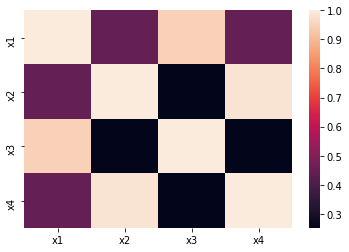

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


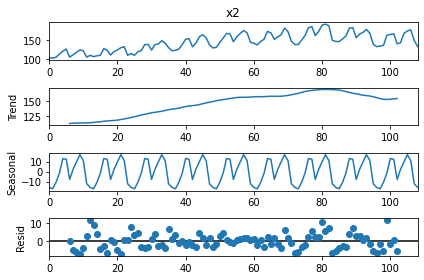

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_ts_forecast, freq = 12)
decomp.plot();

данные не стационары однако можно увидеть тренд на возрастание и сезонность на начало и конец года
и высокую зависимость от x4

In [ ]:
from statsmodels.tsa.stattools import adfuller
s_test = adfuller(data_ts_forecast,regression="ct")
print("p value > 0.05 means data is non-stationary: ", s_test[1])

p value > 0.05 means data is non-stationary:  0.828529824578814


In [ ]:
from statsmodels.regression.linear_model import OLS
model_ols = OLS(data['x1'],data_ts_forecast)

In [ ]:
result = model_ols.fit(cov_type='HC1')
result 

In [ ]:
data_ts_forecast.shape

(109,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['x1'],data_ts_forecast,test_size=0.2)

In [ ]:
from statsmodels.regression.linear_model import OLS
model_ols = OLS(y_train,X_train)

In [ ]:
results=model_ols.fit()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     x2   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              3219.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                    6.30e-70
Time:                        12:09:13   Log-Likelihood:                         -398.28
No. Observations:                  87   AIC:                                      798.6
Df Residuals:                      86   BIC:                                      801.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
predictions = results.predict(X_test)

In [ ]:
%pip install fbprophet

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

25.091612295941253


In [ ]:
prophet=data[['date','x2']]
prophet.columns = ['ds', 'y']

In [ ]:
from fbprophet import Prophet
train_df = prophet[:-27] 

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
train_df

,ds,y
0,1994-01-01,104.04
1,1994-01-02,102.74
2,1994-01-03,105.23
3,1994-01-04,113.63
4,1994-01-05,120.77
...,...,...
77,2000-01-06,184.26
78,2000-01-07,161.13
79,2000-01-08,171.94
80,2000-01-09,188.10


In [ ]:
%pip install pmdarima

     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 2.1MB 31.9MB/s 
     |████████████████████████████████| 9.5MB 41.1MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_ts['x2'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=606.495, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=642.225, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=605.299, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=606.312, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=617.260, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=605.527, Time=0.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=605.823, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=604.561, Time=0.15 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=605.593, Time=0.44 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=606.985, Time=1.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=621.217, Time=0.11 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=606.515, Time=0.21 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=607.280, Time=0.65 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=606.451, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  109
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -299.281
Date:                              Tue, 12 Jan 2021   AIC                            604.561
Time:                                      12:36:08   BIC                            612.255
Sample:                                           0   HQIC                           607.671
                                              - 109                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4427      0.091     -4.886      0.000      -0.620      -0.265
ma.S.L12      -0.4512      0.123     -3.670      0.000      -0.692      -0.210
sigma2        28.9743      4.671      6.203      0.000      19.819      38.129
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.53
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               2.06   Skew:                             0.40
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model = SARIMAX(data_ts_forecast,order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))

In [ ]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 x2   No. Observations:                  109
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -299.583
Date:                            Tue, 12 Jan 2021   AIC                            609.167
Time:                                    12:40:56   BIC                            621.989
Sample:                                         0   HQIC                           614.350
                                            - 109                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4367      0.089     -4.891      0.000      -0.612      -0.262
ar.S.L12      -0.8506      0.617     -1.379      0.168      -2.060       0.359
ar.S.L24      -0.3210      0.298     -1.079      0.281      -0.904       0.262
ma.S.L12       0.3267      0.649      0.504      0.615      -0.945       1.598
sigma2        28.8711      4.377      6.597      0.000      20.293      37.449
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.79   Prob(JB):                         0.43
Heteroskedasticity (H):               2.03   Skew:                             0.32
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

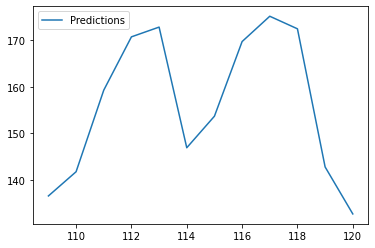

In [ ]:

start = len(data_ts_forecast) 
end = len(data_ts_forecast) + 12 - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  

predictions.plot(legend = True) 
#test['# Passengers'].plot(legend = True) 
